<a href="https://colab.research.google.com/github/Nuha4/Algorithms/blob/master/RQ2_Fewshot_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Story given: 1, 15, 42, 55
PROMOT

You are an expert cybersecurity research assistant. Your sole task is to analyze the following story and answer the question: What persona or identity has the scammer used to communicate with the victim?

To answer, you must select the single, most fitting category from the mandatory list provided below. This category should represent the central tactic or identity the scammer used to perpetrate the fraud.

Core Categories & Definitions:
- Impersonation of Authority: A scammer poses as an official (e.g., police, IRS, bank, title company) to intimidate or trick a victim into sending money or personal data.
- Family Impersonation: A scammer contacts a victim pretending to be a relative in urgent trouble, asking for immediate financial assistance.
- Romance Impersonation: A scammer creates a fake online identity to build a romantic relationship with a victim and then manipulates them into sending money.
- Investment Scams: Scammers lure victims with fraudulent opportunities (e.g., crypto, stocks) promising high or guaranteed returns with little to no risk.
- Goods & Services Fraud: This involves fraudulent online sales where victims either pay for goods/services they never receive or are sellers tricked by fake payments.
- Subscription Scams: Victims are tricked into signing up for recurring payments, often through deceptive "free trial" offers or unclear terms and conditions.
- Extortion & Blackmail: A scammer threatens to release compromising or sensitive information about the victim unless a ransom is paid.
- Account Takeover & Malware: Scammers use malicious software (malware) or phishing tactics to gain unauthorized access to a victim's accounts or devices to steal data or money.
- Wrong Number Scams: A scammer initiates contact via a seemingly accidental text message, then builds rapport to pivot into a romance or investment scam.
- Recovery & Assistance Scams: Scammers target previous scam victims, promising to recover their lost money or assets in exchange for an upfront fee.
- None: Use this category ONLY when the story is too vague to classify, the scammer's persona is not described, or the scam type does not clearly fit into any of the other defined categories. This is the designated "catch-all" option.

Instructions & Rules:
- Read the provided story carefully.
- Choose only ONE category from the list that best describes the scammer's core persona or strategy.
- If the scammer's persona or strategy does not fit any of the specific Core Categories, you MUST choose `None`. Do not try to force a fit.
- The `None` category is a critical choice, not a failure. Use it when necessary to maintain data quality.
- Do NOT provide explanations or any text other than the name of the single category you have chosen.

--- EXAMPLES ---

Story: "Well, we were supposed to close on our first home this upcoming tuesday. Today we received an email stating closing was ready to go, and that the closing costs were ready to be wire transferred. The emails, wiring instructions, address, names from our title company were all the same. Sent the money at 100 PM. Noticed the scam around 8 PM. Based on all the posts in this sub, I know there's no hope. But now we can't afford to buy the house. Just absolutely devastating. I already called the bank, police, and did the FBI complaint. Just so upset feel like idiots. UPDATE I've seen enough comments about what I should have done. I'm getting comments about how obviously the emails and instructions couldn't have been the same. Well obviously they weren't. But they looked ALMOST identical. I don't need advice on what I SHOULD have done. I need advice on steps I can take now and to warn upcoming home buyers of the things I didn't know as a young woman."
Category: Impersonation of Authority

---

Story: "I really don't know what to do in this situation, and I was letting stuff slide before but now I'm desperate for advice. So, first off, I'm a minor (17, 18 in April), so I don't really have any control over what she does but that also means she's my legal guardian and thus this will affect me too. Plus, we have section 8 so this is especially bad for us. She met a romance scammer on Facebook (he had all the signs, like taking the messages off of Facebook, asking her to download third-party apps to give her money, saying he was an engineer working on an oil rig so he couldn't come see her, etc.) Even I didn't realize for a while because I was excited for her and for us, but once I finally figured it out, I told her to delete all those other apps and say she would not send him any more, which she did. After that, everything seemed harmless enough and she even acknowledged he probably wasn't genuine, so I thought it'd be okay if I didn't push her to stop talking to him. But now she says he wants to send a six digit check and have her send 1000 out of it back, and even though I had her promise that she wouldn't do anything with the money if it actually came until she talked to her bank about it, I heard her say to him on the phone that she can't put it in her normal bank account because they'd tell the state about it. So I think she wants to actually take it and send the 1000, and keep it in something else, which I'm really scared about because I've heard about scammers sending checks and then taking the money back after the person's used some of it, or the check bouncing after they've used it and leaving them in the hole, etc. So, I need some advice on what to do. Do you guys think there's any way I can get her to listen? What company or organization I talk to about this? Edit Thank you all for the advice and resources you provided! I told my siblings about it, and also told her all the information you all told me, so I'm hoping that she listens, but if she doesn't, one of my siblings has said she'll talk to her with more provided info, and if she doesn't even listen to her, I'll call adult protective services to see if she'll listen to them instead. I also had the idea of seeing if I can find and get her to try out some ways of making some friends."
Category: Romance Impersonation

---

Story: "If you ever come across Matt Champlin DO NOT fall for his scam. I hopped on call with him a couple times, he promised a mentorship program and helping me land a sales position. As soon as I sent him 1,000 he ghosted me. Keep in mind I'm 17 years old so 1,000 is a lot for me."
Category: Goods & Services Fraud

---

Story: "My father was scammed for 250k Context Timeframe Past 2 months My father is in his mid 50's and just lost 250k in "investments" from a company known as Berge. They have a website (linking for visibility) My father took roughly 150k from his own account and the rest from other people. This money was sent via Coinbase and they showed him 800k in "profit" which was fake. When he attempted to withdraw this money he was asked to pay another 125k in "taxes". He thought nothing of it. I raised the red flag, did some research and surely enough it was a scam. I told him and he didn't take it well. Denied at first, slowly started to accept over time."
Category: Investment Scams

--- END EXAMPLES ---

Story:
"""
{story_text}
"""
Category:


In [1]:
!pip install transformers torch accelerate bitsandbytes scikit-learn pandas tqdm -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 33.2 MB/s eta 0:00:00


In [18]:
# ==============================================================================
# CELL 1: INSTALLATION & IMPORTS
# ==============================================================================

import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm.notebook import tqdm
import gc # Garbage Collector for memory management
from huggingface_hub import notebook_login

# ==============================================================================
# CELL 2: HUGGING FACE LOGIN (Required for Llama-3)
# ==============================================================================
# This will prompt you to enter a Hugging Face token to access gated models.
# 1. Go to https://huggingface.co/settings/tokens to get your token.
# 2. You must also go to the Llama-3 model page and request access first.
# https://huggingface.co/meta-llama/Meta-Llama-3-8B-Instruct
print("Please log in to your Hugging Face account.")
notebook_login()


# ==============================================================================
# CELL 3: CONFIGURATION AND PROMPT DEFINITION
# ==============================================================================
# Define the Hugging Face model IDs to test
# IMPORTANT: Colab may time out if you run too many. Start with 2, then add more.
MODELS_TO_TEST = {
    # "Mistral-7B-Instruct": "mistralai/Mistral-7B-Instruct-v0.2",
    # "Gemma-7B-Instruct": "google/gemma-1.1-7b-it",
    # "LLaMA-3-8B-Instruct": "meta-llama/Meta-Llama-3-8B-Instruct",
    # "Zephyr-7B-Beta": "HuggingFaceH4/zephyr-7b-beta" # Another great option
}

# Your final, validated prompt template
PROMPT_TEXT = """You are an expert cybersecurity research assistant. Your sole task is to analyze the following story and answer the question: What persona or identity has the scammer used to communicate with the victim?

To answer, you must select the single, most fitting category from the mandatory list provided below. This category should represent the central tactic or identity the scammer used to perpetrate the fraud.

Core Categories & Definitions:
- Impersonation of Authority: A scammer poses as an official (e.g., police, IRS, bank, title company) to intimidate or trick a victim into sending money or personal data.
- Family Impersonation: A scammer contacts a victim pretending to be a relative in urgent trouble, asking for immediate financial assistance.
- Romance Impersonation: A scammer creates a fake online identity to build a romantic relationship with a victim and then manipulates them into sending money.
- Investment Scams: Scammers lure victims with fraudulent opportunities (e.g., crypto, stocks) promising high or guaranteed returns with little to no risk.
- Goods & Services Fraud: This involves fraudulent online sales where victims either pay for goods/services they never receive or are sellers tricked by fake payments.
- Subscription Scams: Victims are tricked into signing up for recurring payments, often through deceptive "free trial" offers or unclear terms and conditions.
- Extortion & Blackmail: A scammer threatens to release compromising or sensitive information about the victim unless a ransom is paid.
- Account Takeover & Malware: Scammers use malicious software (malware) or phishing tactics to gain unauthorized access to a victim's accounts or devices to steal data or money.
- Wrong Number Scams: A scammer initiates contact via a seemingly accidental text message, then builds rapport to pivot into a romance or investment scam.
- Recovery & Assistance Scams: Scammers target previous scam victims, promising to recover their lost money or assets in exchange for an upfront fee.
- Unclear: Use this category ONLY when the story is too vague to classify, the scammer's persona is not described, or the scam type does not clearly fit into any of the other defined categories or the scam is primarily in-person. This is the designated "catch-all" option.

Instructions & Rules:
- Read the provided story carefully.
- Choose only ONE category from the list that best describes the scammer's core persona or strategy.
- If the scammer's persona or strategy does not fit any of the specific Core Categories, you MUST choose `Unclear`. Do not try to force a fit.
- The `Unclear` category is a critical choice, not a failure. Use it when necessary to maintain data quality.
- Do NOT provide explanations or any text other than the name of the single category you have chosen.

--- EXAMPLES ---

Story: "Well, we were supposed to close on our first home this upcoming tuesday. Today we received an email stating closing was ready to go, and that the closing costs were ready to be wire transferred. The emails, wiring instructions, address, names from our title company were all the same. Sent the money at 100 PM. Noticed the scam around 8 PM. Based on all the posts in this sub, I know there's no hope. But now we can't afford to buy the house. Just absolutely devastating. I already called the bank, police, and did the FBI complaint. Just so upset feel like idiots. UPDATE I've seen enough comments about what I should have done. I'm getting comments about how obviously the emails and instructions couldn't have been the same. Well obviously they weren't. But they looked ALMOST identical. I don't need advice on what I SHOULD have done. I need advice on steps I can take now and to warn upcoming home buyers of the things I didn't know as a young woman."
Category: Impersonation of Authority

---

Story: "I really don't know what to do in this situation, and I was letting stuff slide before but now I'm desperate for advice. So, first off, I'm a minor (17, 18 in April), so I don't really have any control over what she does but that also means she's my legal guardian and thus this will affect me too. Plus, we have section 8 so this is especially bad for us. She met a romance scammer on Facebook (he had all the signs, like taking the messages off of Facebook, asking her to download third-party apps to give her money, saying he was an engineer working on an oil rig so he couldn't come see her, etc.) Even I didn't realize for a while because I was excited for her and for us, but once I finally figured it out, I told her to delete all those other apps and say she would not send him any more, which she did. After that, everything seemed harmless enough and she even acknowledged he probably wasn't genuine, so I thought it'd be okay if I didn't push her to stop talking to him. But now she says he wants to send a six digit check and have her send 1000 out of it back, and even though I had her promise that she wouldn't do anything with the money if it actually came until she talked to her bank about it, I heard her say to him on the phone that she can't put it in her normal bank account because they'd tell the state about it. So I think she wants to actually take it and send the 1000, and keep it in something else, which I'm really scared about because I've heard about scammers sending checks and then taking the money back after the person's used some of it, or the check bouncing after they've used it and leaving them in the hole, etc. So, I need some advice on what to do. Do you guys think there's any way I can get her to listen? What company or organization I talk to about this? Edit Thank you all for the advice and resources you provided! I told my siblings about it, and also told her all the information you all told me, so I'm hoping that she listens, but if she doesn't, one of my siblings has said she'll talk to her with more provided info, and if she doesn't even listen to her, I'll call adult protective services to see if she'll listen to them instead. I also had the idea of seeing if I can find and get her to try out some ways of making some friends."
Category: Romance Impersonation

---

Story: "If you ever come across Matt Champlin DO NOT fall for his scam. I hopped on call with him a couple times, he promised a mentorship program and helping me land a sales position. As soon as I sent him 1,000 he ghosted me. Keep in mind I'm 17 years old so 1,000 is a lot for me."
Category: Goods & Services Fraud

---

Story: "My father was scammed for 250k Context Timeframe Past 2 months My father is in his mid 50's and just lost 250k in "investments" from a company known as Berge. They have a website (linking for visibility) My father took roughly 150k from his own account and the rest from other people. This money was sent via Coinbase and they showed him 800k in "profit" which was fake. When he attempted to withdraw this money he was asked to pay another 125k in "taxes". He thought nothing of it. I raised the red flag, did some research and surely enough it was a scam. I told him and he didn't take it well. Denied at first, slowly started to accept over time."
Category: Investment Scams

--- END EXAMPLES ---

Story:
\"\"\"
{story_text}
\"\"\"
Category:
"""

# Define the valid output categories for cleaning the model's response
VALID_CATEGORIES = [
    "Impersonation of Authority", "Family Impersonation", "Romance Impersonation",
    "Investment Scams", "Goods & Services Fraud", "Subscription Scams",
    "Extortion & Blackmail", "Account Takeover & Malware", "Wrong Number Scams",
    "Recovery & Assistance Scams", "Unclear"
]


# ==============================================================================
# CELL 4: HELPER FUNCTIONS
# ==============================================================================

def clean_model_output(raw_output: str) -> str:
    """Cleans the raw output from the LLM to match a valid category."""
    # The model output includes the prompt, so we take the last part.
    # We look for the final occurrence of "Category:" to get the text after it.
    if "Category:" in raw_output:
        cleaned = raw_output.split("Category:")[-1].strip()
    else:
        cleaned = raw_output.strip()

    for category in VALID_CATEGORIES:
        if category.lower() in cleaned.lower():
            return category
    return "Failed to Parse"

# ==============================================================================
# CELL 5: MAIN EXECUTION AND EVALUATION
# ==============================================================================

# def run_evaluation():
#     print("Starting model evaluation process...")

#     # Load the dataset
#     try:
#         df = pd.read_csv("scam_dataset_20.csv")
#         # For testing, you might want to run on a smaller sample first
#         # df = df.sample(n=10, random_state=42)
#         print(f"Loaded {len(df)} stories from scam_dataset.csv")
#     except FileNotFoundError:
#         print("Error: scam_dataset.csv not found. Please upload it to the Colab session.")
#         return

#     results_df = df.copy()

#     # Define quantization configuration
#     quantization_config = BitsAndBytesConfig(
#         load_in_4bit=True,
#         bnb_4bit_quant_type="nf4",
#         bnb_4bit_compute_dtype=torch.float16,
#     )

#     # --- Main Loop ---
#     for model_name, model_id in MODELS_TO_TEST.items():
#         print(f"\n{'='*20}\n--- Testing Model: {model_name} ({model_id}) ---\n{'='*20}")

#         try:
#             # Load model and tokenizer with quantization
#             print("Loading model and tokenizer...")
#             tokenizer = AutoTokenizer.from_pretrained(model_id)
#             model = AutoModelForCausalLM.from_pretrained(
#                 model_id,
#                 quantization_config=quantization_config,
#                 device_map="auto" # Automatically use the GPU
#             )

#             # Create a text-generation pipeline
#             pipe = pipeline(
#                 "text-generation",
#                 model=model,
#                 tokenizer=tokenizer,
#             )

#             predictions = []
#             # Generate predictions for each story
#             for story in tqdm(df['Story'], desc=f"Generating predictions with {model_name}"):
#                 full_prompt = PROMPT_TEXT.format(story_text=story)

#                 # We need to format the prompt according to the model's chat template for best results
#                 messages = [{"role": "user", "content": full_prompt}]

#                 # Llama-3 requires a different terminators setup
#                 terminators = [
#                     pipe.tokenizer.eos_token_id,
#                     pipe.tokenizer.convert_tokens_to_ids("<|eot_id|>")
#                 ] if "Llama-3" in model_name else None

#                 outputs = pipe(
#                     messages,
#                     max_new_tokens=50,
#                     do_sample=False, # Use greedy decoding for classification
#                     temperature=None,
#                     top_p=None,
#                     eos_token_id=terminators,
#                 )

#                 # Extract the generated text from the complex output structure
#                 raw_output = outputs[0]['generated_text'][-1]['content']
#                 prediction = clean_model_output(raw_output)
#                 predictions.append(prediction)

#             results_df[f'prediction_{model_name}'] = predictions
#             print(f"Finished testing {model_name}.")

#         except Exception as e:
#             print(f"An error occurred while testing {model_name}: {e}")
#             print("Skipping this model.")
#             # Fill column with error message so we know it failed
#             results_df[f'prediction_{model_name}'] = "Model Failed"

#         finally:
#             # CRITICAL: Clear memory before loading the next model
#             del model
#             del tokenizer
#             del pipe
#             gc.collect()
#             torch.cuda.empty_cache()
#             print("Cleaned up GPU memory.")

def run_evaluation():
    print("Starting model evaluation process...")

    try:
        df = pd.read_csv("scam_dataset.csv")
        print(f"Loaded {len(df)} stories from scam_dataset.csv")
    except FileNotFoundError:
        print("Error: scam_dataset.csv not found. Please upload it to the Colab session.")
        return

    results_df = df.copy()

    quantization_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.float16,
    )

    # --- Main Loop ---
    for model_name, model_id in MODELS_TO_TEST.items():
        print(f"\n{'='*20}\n--- Testing Model: {model_name} ({model_id}) ---\n{'='*20}")

        try:
            print("Loading model and tokenizer...")
            tokenizer = AutoTokenizer.from_pretrained(model_id)
            model = AutoModelForCausalLM.from_pretrained(
                model_id,
                quantization_config=quantization_config,
                device_map="auto"
            )

            if tokenizer.pad_token is None:
                print("Tokenizer does not have a pad_token. Setting it to eos_token.")
                tokenizer.pad_token = tokenizer.eos_token
                # For generative models, left-padding is preferred.
                tokenizer.padding_side = "left"

            pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)

            # --- EFFICIENCY CHANGE IS HERE ---
            # 1. Prepare all prompts in a list first
            all_prompts = []
            for story in df['Story']:
                 full_prompt = PROMPT_TEXT.format(story_text=story)
                 messages = [{"role": "user", "content": full_prompt}]
                 # The pipeline needs the formatted chat prompt for each item
                 all_prompts.append(pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True))

            print(f"Generating predictions for {len(all_prompts)} stories in batches...")

            # 2. Define terminators for models like Llama-3
            terminators = None
            if "Llama-3" in model_name:
                terminators = [
                    pipe.tokenizer.eos_token_id,
                    pipe.tokenizer.convert_tokens_to_ids("<|eot_id|>")
                ]

            # 3. Call the pipeline ONCE with the entire list of prompts
            # The pipeline handles the batching automatically.
            # batch_size is crucial for managing memory. Start with 8 for a T4 GPU.
            # If you get an out-of-memory error, lower this to 4, 2, or 1.
            outputs = pipe(
                all_prompts,
                max_new_tokens=50,
                do_sample=False,
                temperature=None,
                top_p=None,
                eos_token_id=terminators,
                batch_size=8, # <-- BATCH PROCESSING CONTROL
                return_full_text=False # <-- IMPORTANT: only return the generated part
            )

            # 4. Process the list of results
            predictions = [clean_model_output(output[0]['generated_text']) for output in outputs]

            results_df[f'prediction_{model_name}'] = predictions
            print(f"Finished testing {model_name}.")

        except Exception as e:
            print(f"An error occurred while testing {model_name}: {e}")
            print("Skipping this model.")
            results_df[f'prediction_{model_name}'] = "Model Failed"

        finally:
            del model, tokenizer, pipe
            gc.collect()
            torch.cuda.empty_cache()
            print("Cleaned up GPU memory.")

    # Save the dataframe with all predictions
    results_df.to_csv("model_evaluation_results.csv", index=False)
    print("\nSaved all model predictions to model_evaluation_results.csv")

    # --- Performance Analysis ---
    # print("\n--- PERFORMANCE ANALYSIS ---")
    # ground_truth = results_df['Persona_Category']
    # report_content = "MODEL EVALUATION REPORT\n=========================\n\n"

    # for model_name in MODELS_TO_TEST.keys():
    #     prediction_column = f'prediction_{model_name}'
    #     if prediction_column not in results_df or results_df[prediction_column].iloc[0] == "Model Failed":
    #         print(f"\nSkipping analysis for failed model: {model_name}")
    #         continue

    #     print(f"\n--- Results for {model_name} ---")
    #     model_predictions = results_df[prediction_column]

    #     accuracy = accuracy_score(ground_truth, model_predictions)
    #     print(f"Overall Accuracy: {accuracy:.2%}")

    #     report = classification_report(ground_truth, model_predictions, labels=VALID_CATEGORIES, zero_division=0)
    #     print("Classification Report:")
    #     print(report)

    #     cm = confusion_matrix(ground_truth, model_predictions, labels=VALID_CATEGORIES)
    #     cm_df = pd.DataFrame(cm, index=VALID_CATEGORIES, columns=VALID_CATEGORIES)
    #     print("Confusion Matrix:")
    #     print(cm_df)

    #     report_content += f"Model: {model_name}\nOverall Accuracy: {accuracy:.2%}\n\n"
    #     report_content += "Classification Report:\n" + report + "\n"
    #     report_content += "---------------------------------------\n\n"

    # with open("full_evaluation_report.txt", "w") as f:
    #     f.write(report_content)
    # print("\nSaved detailed performance metrics to full_evaluation_report.txt")
    # print("\nEvaluation complete. Check the files panel to download your results.")

    # --- PERFORMANCE ANALYSIS (REVISED TO HANDLE UNKNOWN LABELS) ---
    print("\n--- PERFORMANCE ANALYSIS ---")
    report_content = "MODEL EVALUATION REPORT\n=========================\n\n"

    # The ground truth labels are consistent across all tests
    ground_truth = results_df['Persona_Category']

    for model_name in MODELS_TO_TEST.keys():
        prediction_column = f'prediction_{model_name}'

        # Check if the column exists and the model didn't fail entirely
        if prediction_column not in results_df or results_df[prediction_column].iloc[0] == "Model Failed":
            print(f"\nSkipping analysis for failed model: {model_name}")
            continue

        print(f"\n--- Results for {model_name} ---")
        model_predictions = results_df[prediction_column]

        # --- THE FIX IS HERE ---
        # 1. Get all unique labels from both the true and predicted sets.
        #    This ensures scikit-learn knows about "Failed to Parse" or other anomalies.
        true_labels = set(ground_truth.unique())
        pred_labels = set(model_predictions.unique())
        all_labels_present = sorted(list(true_labels.union(pred_labels)))
        # --- END OF FIX ---

        # Calculate Accuracy
        # Note: accuracy_score is simple and doesn't need the full label list, but it's good practice.
        accuracy = accuracy_score(ground_truth, model_predictions)
        print(f"Overall Accuracy: {accuracy:.2%}")

        # Generate Classification Report (Precision, Recall, F1-Score)
        # We pass the combined list of labels to the `labels` parameter.
        report = classification_report(
            ground_truth,
            model_predictions,
            labels=all_labels_present, # Use the combined list
            zero_division=0
        )
        print("Classification Report:")
        print(report)

        # Generate Confusion Matrix
        cm = confusion_matrix(
            ground_truth,
            model_predictions,
            labels=all_labels_present # Use the combined list
        )
        cm_df = pd.DataFrame(cm, index=all_labels_present, columns=all_labels_present)
        print("Confusion Matrix:")
        print(cm_df)

        # Append to the report file
        report_content += f"Model: {model_name}\n"
        report_content += f"Overall Accuracy: {accuracy:.2%}\n\n"
        report_content += "Classification Report:\n"
        report_content += report + "\n"
        report_content += "---------------------------------------\n\n"

    # Save the detailed report to a text file
    with open("full_evaluation_report_batched.txt", "w") as f:
        f.write(report_content)
    print("\nSaved detailed performance metrics to full_evaluation_report_batched.txt")
    print("\nEvaluation complete. Check the files panel to download your results.")


# Run the entire process
run_evaluation()

Please log in to your Hugging Face account.


Starting model evaluation process...
Loaded 95 stories from scam_dataset.csv

--- Testing Model: Gemma-7B-Instruct (google/gemma-1.1-7b-it) ---
Loading model and tokenizer...


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Device set to use cuda:0


Generating predictions for 95 stories in batches...
Finished testing Gemma-7B-Instruct.
Cleaned up GPU memory.

Saved all model predictions to model_evaluation_results.csv

--- PERFORMANCE ANALYSIS ---

--- Results for Gemma-7B-Instruct ---
Overall Accuracy: 44.21%
Classification Report:
                            precision    recall  f1-score   support

Account Takeover & Malware       0.60      0.60      0.60         5
     Extortion & Blackmail       0.00      0.00      0.00         6
           Failed to Parse       0.00      0.00      0.00         0
      Family Impersonation       0.00      0.00      0.00         1
    Goods & Services Fraud       0.50      0.43      0.46         7
Impersonation of Authority       0.23      0.75      0.35        12
          Investment Scams       0.91      0.67      0.77        15
     Romance Impersonation       0.67      0.75      0.71         8
        Subscription Scams       0.50      0.33      0.40         6
                   Unclear    

# **Performance Visualization**

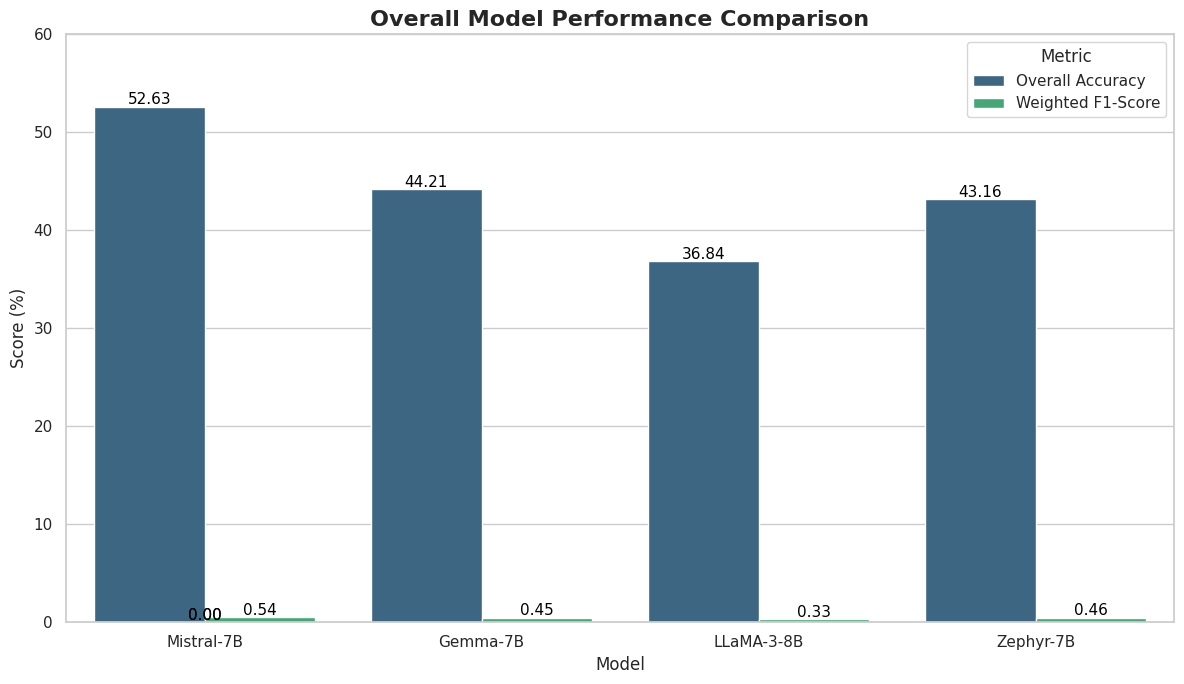

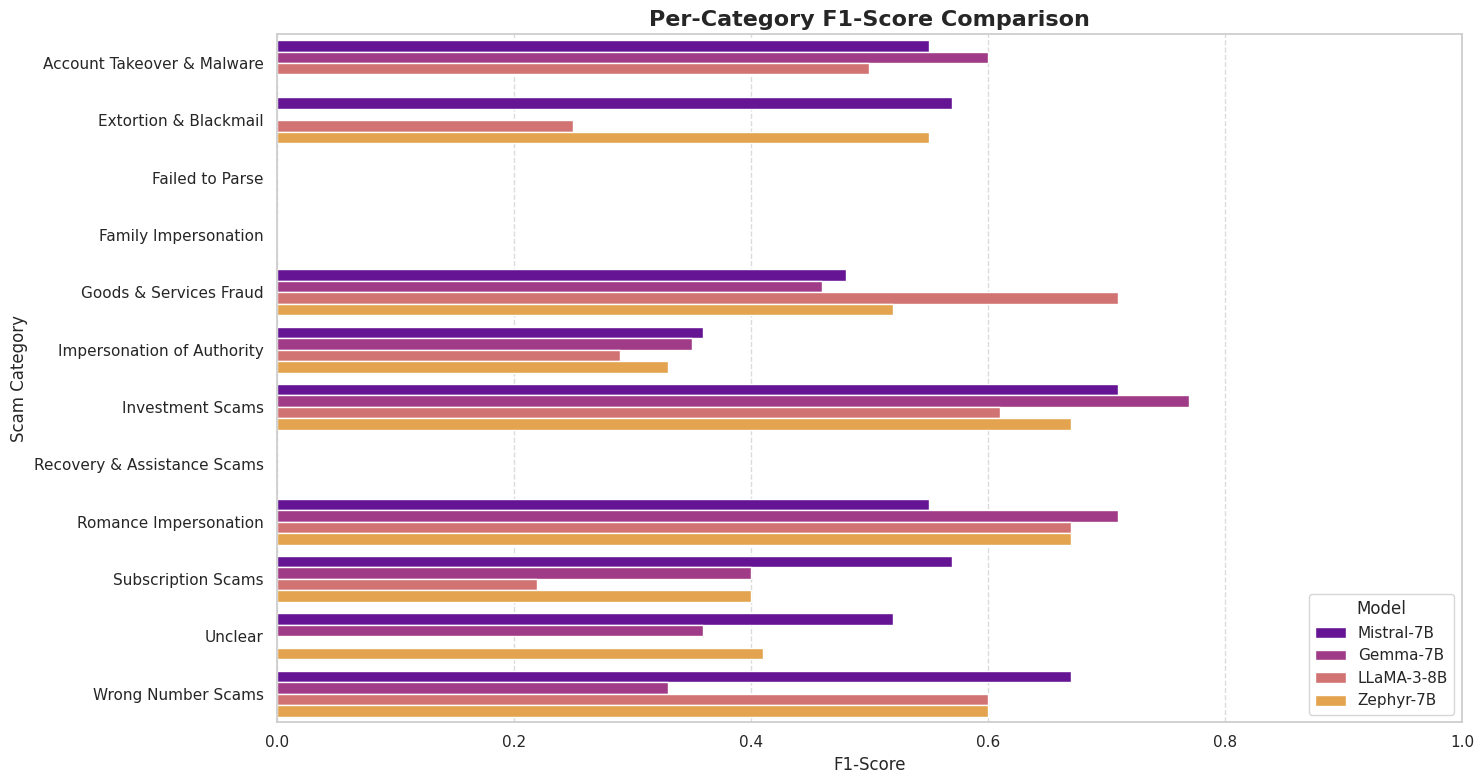

/tmp/ipython-input-3325175322.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=unclear_df, x='Model', y='F1-Score', palette='rocket')


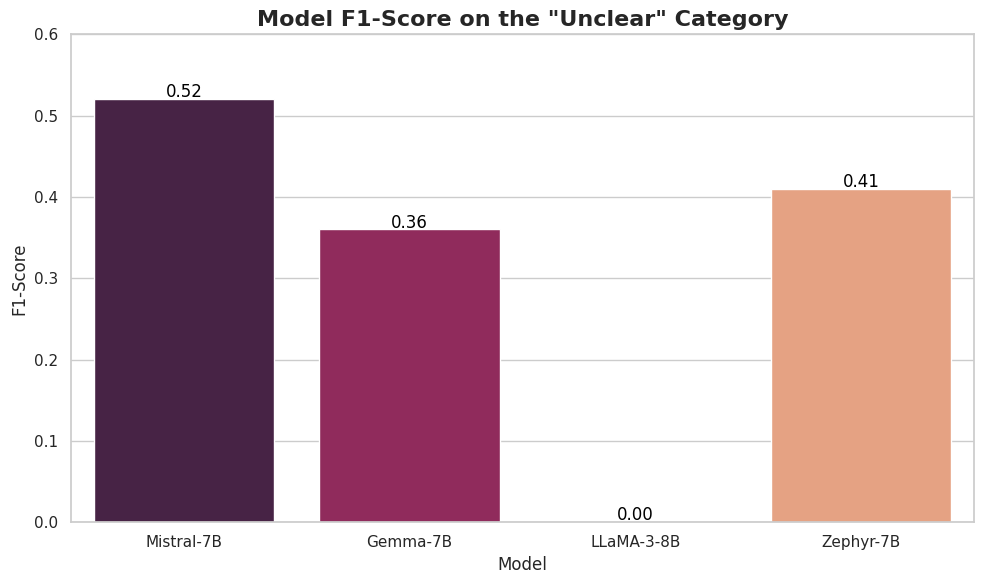

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Data Preparation (CORRECTED) ---
# All lists now have the same length (44 elements).
# I have added the missing categories and scores from your reports.

data = {
    'Model': [
        'Mistral-7B', 'Mistral-7B', 'Mistral-7B', 'Mistral-7B', 'Mistral-7B', 'Mistral-7B', 'Mistral-7B', 'Mistral-7B', 'Mistral-7B', 'Mistral-7B', 'Mistral-7B',
        'Gemma-7B', 'Gemma-7B', 'Gemma-7B', 'Gemma-7B', 'Gemma-7B', 'Gemma-7B', 'Gemma-7B', 'Gemma-7B', 'Gemma-7B', 'Gemma-7B', 'Gemma-7B',
        'LLaMA-3-8B', 'LLaMA-3-8B', 'LLaMA-3-8B', 'LLaMA-3-8B', 'LLaMA-3-8B', 'LLaMA-3-8B', 'LLaMA-3-8B', 'LLaMA-3-8B', 'LLaMA-3-8B', 'LLaMA-3-8B',
        'Zephyr-7B', 'Zephyr-7B', 'Zephyr-7B', 'Zephyr-7B', 'Zephyr-7B', 'Zephyr-7B', 'Zephyr-7B', 'Zephyr-7B', 'Zephyr-7B', 'Zephyr-7B', 'Zephyr-7B'
    ],
    'Category': [
        # Mistral (11 categories)
        'Account Takeover & Malware', 'Extortion & Blackmail', 'Goods & Services Fraud', 'Impersonation of Authority', 'Investment Scams', 'Romance Impersonation', 'Subscription Scams', 'Unclear', 'Wrong Number Scams', 'Family Impersonation', 'Recovery & Assistance Scams',
        # Gemma (11 categories)
        'Account Takeover & Malware', 'Extortion & Blackmail', 'Goods & Services Fraud', 'Impersonation of Authority', 'Investment Scams', 'Romance Impersonation', 'Subscription Scams', 'Unclear', 'Wrong Number Scams', 'Family Impersonation', 'Failed to Parse',
        # LLaMA-3 (10 categories)
        'Account Takeover & Malware', 'Extortion & Blackmail', 'Goods & Services Fraud', 'Impersonation of Authority', 'Investment Scams', 'Romance Impersonation', 'Subscription Scams', 'Unclear', 'Wrong Number Scams', 'Family Impersonation',
        # Zephyr (11 categories)
        'Account Takeover & Malware', 'Extortion & Blackmail', 'Goods & Services Fraud', 'Impersonation of Authority', 'Investment Scams', 'Romance Impersonation', 'Subscription Scams', 'Unclear', 'Wrong Number Scams', 'Family Impersonation', 'Recovery & Assistance Scams'
    ],
    'F1-Score': [
        # Mistral
        0.55, 0.57, 0.48, 0.36, 0.71, 0.55, 0.57, 0.52, 0.67, 0.00, 0.00,
        # Gemma
        0.60, 0.00, 0.46, 0.35, 0.77, 0.71, 0.40, 0.36, 0.33, 0.00, 0.00,
        # LLaMA-3
        0.50, 0.25, 0.71, 0.29, 0.61, 0.67, 0.22, 0.00, 0.60, 0.00,
        # Zephyr
        0.00, 0.55, 0.52, 0.33, 0.67, 0.67, 0.40, 0.41, 0.60, 0.00, 0.00
    ]
}

df = pd.DataFrame(data)

# Summary data for the overall performance chart
summary_data = {
    'Model': ['Mistral-7B', 'Gemma-7B', 'LLaMA-3-8B', 'Zephyr-7B'],
    'Overall Accuracy': [52.63, 44.21, 36.84, 43.16],
    'Weighted F1-Score': [0.54, 0.45, 0.33, 0.46]
}
summary_df = pd.DataFrame(summary_data)

# Set a professional plot style
sns.set_theme(style="whitegrid")

# --- Plot 1: Overall Performance Comparison (for Slide 3) ---
plt.figure(figsize=(12, 7))
melted_summary_df = summary_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
ax = sns.barplot(data=melted_summary_df, x='Model', y='Score', hue='Metric', palette='viridis')

plt.title('Overall Model Performance Comparison', fontsize=16, weight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score (%)', fontsize=12)
plt.ylim(0, 60)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Metric', fontsize=11)
plt.tight_layout()
plt.savefig("overall_performance.png", dpi=300)
plt.show()


# --- Plot 2: Per-Category F1-Score Comparison (for Slide 5) ---
plt.figure(figsize=(15, 8))
# We create a consistent order for categories to make the chart easier to read
category_order = sorted(df['Category'].unique())

sns.barplot(data=df, x='F1-Score', y='Category', hue='Model', palette='plasma', orient='h', order=category_order)

plt.title('Per-Category F1-Score Comparison', fontsize=16, weight='bold')
plt.xlabel('F1-Score', fontsize=12)
plt.ylabel('Scam Category', fontsize=12)
plt.xlim(0, 1.0)
plt.legend(title='Model', loc='lower right', fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("per_category_f1_scores.png", dpi=300)
plt.show()


# --- Plot 3: The LLaMA-3 "Unclear" Category Failure (for Slide 4) ---
unclear_df = df[df['Category'] == 'Unclear']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=unclear_df, x='Model', y='F1-Score', palette='rocket')

plt.title('Model F1-Score on the "Unclear" Category', fontsize=16, weight='bold')
plt.xlabel('Model', fontsize=12)
ylabel = plt.ylabel('F1-Score', fontsize=12)
plt.ylim(0, 0.6)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.savefig("unclear_category_performance.png", dpi=300)
plt.show()

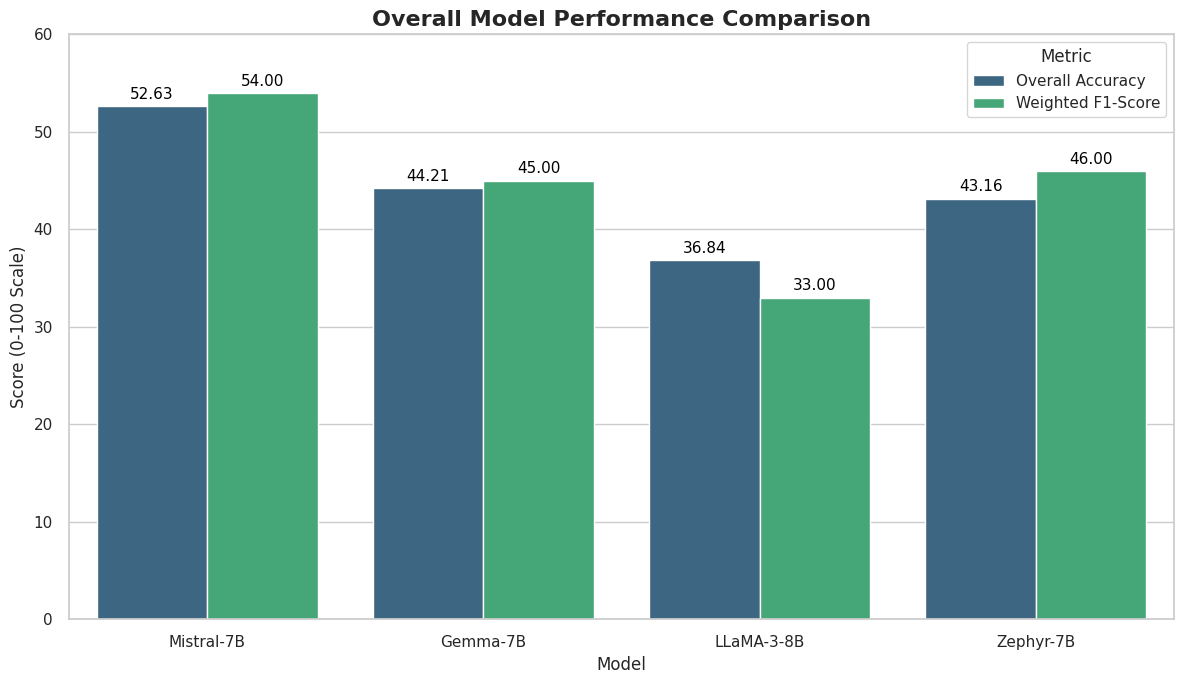

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Data Preparation ---
# This data is correct and self-contained.
summary_data = {
    'Model': ['Mistral-7B', 'Gemma-7B', 'LLaMA-3-8B', 'Zephyr-7B'],
    'Overall Accuracy': [52.63, 44.21, 36.84, 43.16],
    'Weighted F1-Score': [0.54, 0.45, 0.33, 0.46]
}
summary_df = pd.DataFrame(summary_data)


# --- 2. Data Transformation for Plotting ---
# Create a fresh copy to work with.
plot_df = summary_df.copy()

# Normalize the F1-Score to be on a 0-100 scale.
plot_df['Weighted F1-Score'] = plot_df['Weighted F1-Score'] * 100

# "Melt" the DataFrame to a long format suitable for seaborn's hue functionality.
melted_df = plot_df.melt(id_vars='Model', var_name='Metric', value_name='Score')


# --- 3. Plotting with the DEFINITIVE FIX ---
# Set a professional plot style and create a NEW figure and axes.
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))

# Draw the barplot on the new axes.
sns.barplot(data=melted_df, x='Model', y='Score', hue='Metric', palette='viridis', ax=ax)

# Set titles and labels.
ax.set_title('Overall Model Performance Comparison', fontsize=16, weight='bold')
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Score (0-100 Scale)', fontsize=12)
ax.set_ylim(0, 60) # Set Y-axis limit
ax.legend(title='Metric', fontsize=11)
plt.xticks(rotation=0)

# --- THE FIX IS HERE: Use the modern ax.bar_label() method ---
# This method is robust and designed for this exact purpose.
# It iterates through the bar "containers" (one for each metric) and labels them intelligently.
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=11, color='black', padding=3)
# --- END OF FIX ---


plt.tight_layout()
plt.savefig("overall_performance_FINAL.png", dpi=300)
plt.show()

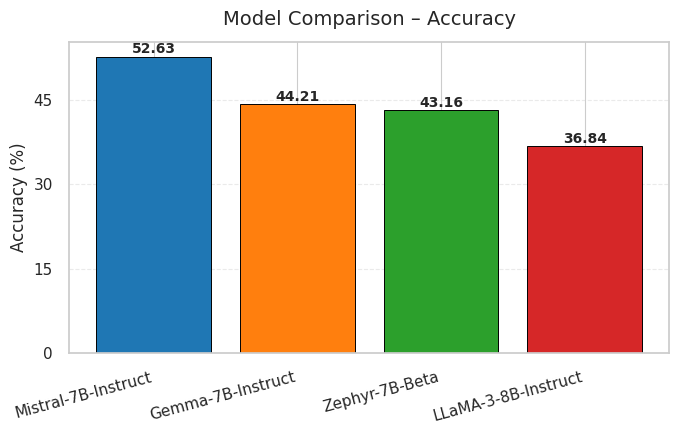

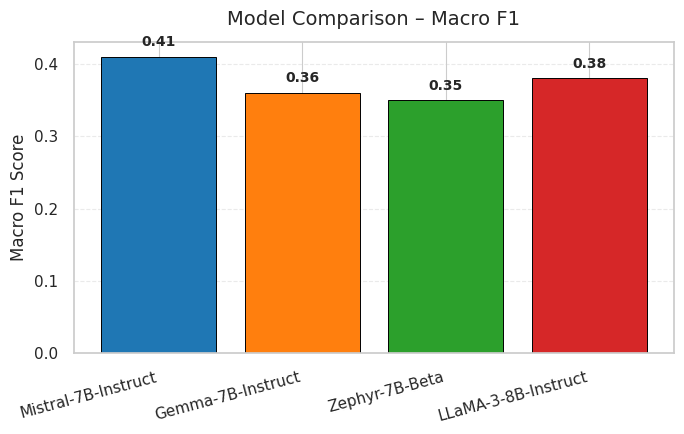

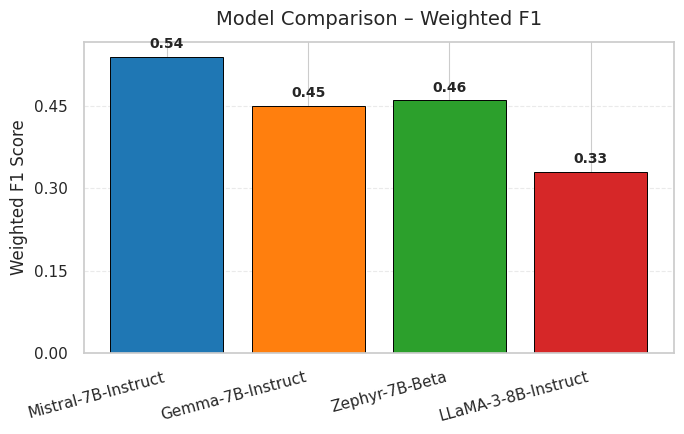

In [29]:
# ==========================================
# 🎓 LLM Persona Classification – Publication Quality Plots
# ==========================================

import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# --- File paths (skip run3) ---
files = [
    "/content/r1_full_evaluation_report_batched.txt",
    "/content/r2_full_evaluation_report_batched.txt"
]

# --- Parse evaluation reports ---
def parse_eval_report(text):
    blocks = text.split("Model:")
    records = []
    for block in blocks[1:]:
        header, *_ = block.split("Classification Report:")
        model = header.strip().splitlines()[0].strip()
        acc = re.search(r"Overall Accuracy:\s*([\d\.]+)%", block)
        macro = re.search(r"macro avg\s+[\d\.]+\s+[\d\.]+\s+([\d\.]+)", block)
        weighted = re.search(r"weighted avg\s+[\d\.]+\s+[\d\.]+\s+([\d\.]+)", block)
        if acc:
            records.append({
                "Model": model,
                "Accuracy": float(acc.group(1)),
                "Macro_F1": float(macro.group(1)) if macro else np.nan,
                "Weighted_F1": float(weighted.group(1)) if weighted else np.nan
            })
    return pd.DataFrame(records)

# --- Combine results ---
dfs = []
for fpath in files:
    with open(fpath, "r", encoding="utf-8") as f:
        dfs.append(parse_eval_report(f.read()))

df_all = pd.concat(dfs, ignore_index=True)

# Keep 4 main models
keep = ["Mistral-7B-Instruct", "LLaMA-3-8B-Instruct", "Zephyr-7B-Beta", "Gemma-7B-Instruct"]
df = df_all[df_all["Model"].isin(keep)].sort_values("Accuracy", ascending=False).reset_index(drop=True)

# --- Professional color palette ---
color_map = {
    "Mistral-7B-Instruct": "#1f77b4",   # deep blue
    "LLaMA-3-8B-Instruct": "#d62728",   # crimson
    "Zephyr-7B-Beta": "#2ca02c",        # green
    "Gemma-7B-Instruct": "#ff7f0e"      # orange
}
df["Color"] = df["Model"].map(color_map)

# --- Matplotlib styling ---
plt.style.use("seaborn-v0_8-paper")
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11
})

# --- Function to plot a clean bar chart ---
def plot_metric(metric, ylabel, title):
    fig, ax = plt.subplots(figsize=(7, 4.5))
    bars = ax.bar(df["Model"], df[metric], color=df["Color"], edgecolor="black", linewidth=0.7)
    ax.set_title(title, pad=12)
    ax.set_ylabel(ylabel)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
    ax.grid(axis='y', linestyle='--', alpha=0.4)

    # Value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f"{height:.2f}", ha='center', va='bottom', fontsize=10, weight='bold')

    plt.xticks(rotation=15, ha="right")
    plt.tight_layout()
    plt.show()

# --- Plot three professional charts ---
plot_metric("Accuracy", "Accuracy (%)", "Model Comparison – Accuracy")
plot_metric("Macro_F1", "Macro F1 Score", "Model Comparison – Macro F1")
plot_metric("Weighted_F1", "Weighted F1 Score", "Model Comparison – Weighted F1")
